11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


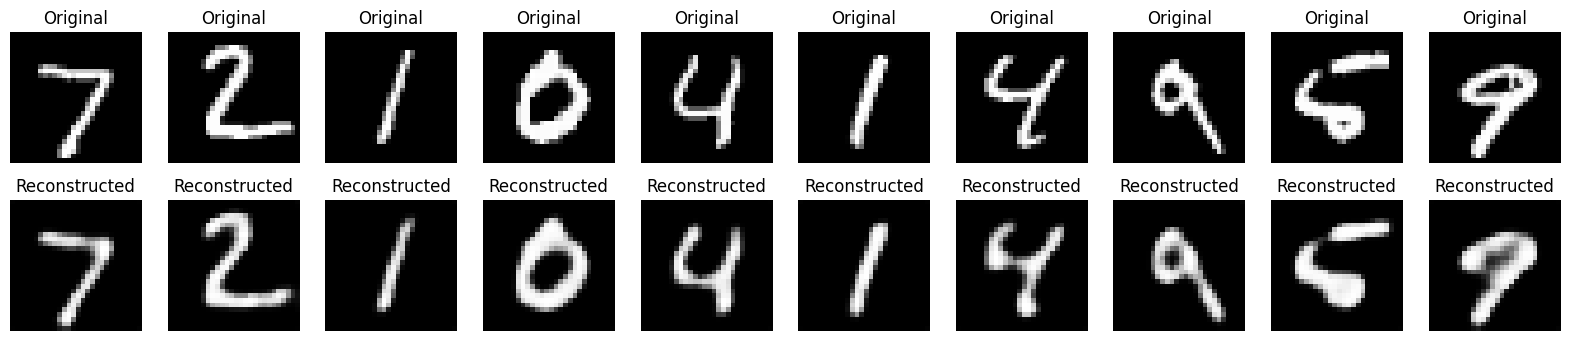

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train[..., None]/255., x_test[..., None]/255.

# Build model
input_img = Input((28,28,1))
x = Conv2D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D(2, padding='same')(x)

x = Conv2D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D(2)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile('adam', 'binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=1, batch_size=128,
                validation_data=(x_test, x_test), verbose=0)

# Predict and plot
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Original")
    plt.subplot(2,10,i+11)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Reconstructed")
plt.show()
